In [1]:
import json

with open('result.json') as f:
    cocodata = json.load(f)

cocodata

{'images': [{'width': 300,
   'height': 225,
   'id': 0,
   'file_name': 'images/807a445b-cd_04.jpg'},
  {'width': 300,
   'height': 225,
   'id': 1,
   'file_name': 'images/f9ce219f-cd_07.jpg'},
  {'width': 300,
   'height': 225,
   'id': 2,
   'file_name': 'images/66d2519c-cd_08.jpg'},
  {'width': 300,
   'height': 225,
   'id': 3,
   'file_name': 'images/88620d05-cd_09.jpg'},
  {'width': 300,
   'height': 225,
   'id': 4,
   'file_name': 'images/94062f30-cd_10.jpg'},
  {'width': 300,
   'height': 225,
   'id': 5,
   'file_name': 'images/6a56f704-cd_22.jpg'},
  {'width': 300,
   'height': 225,
   'id': 6,
   'file_name': 'images/b785b412-cd_23.jpg'},
  {'width': 300,
   'height': 225,
   'id': 7,
   'file_name': 'images/9309e8e3-cd_24.jpg'},
  {'width': 300,
   'height': 225,
   'id': 8,
   'file_name': 'images/daa6f100-cd_32.jpg'},
  {'width': 300,
   'height': 225,
   'id': 9,
   'file_name': 'images/07db6de9-cd_34.jpg'},
  {'width': 300,
   'height': 225,
   'id': 10,
   'file_nam

In [3]:
filenames = [image['file_name'].split("/")[-1] for image in cocodata['images']]
filenames

['807a445b-cd_04.jpg',
 'f9ce219f-cd_07.jpg',
 '66d2519c-cd_08.jpg',
 '88620d05-cd_09.jpg',
 '94062f30-cd_10.jpg',
 '6a56f704-cd_22.jpg',
 'b785b412-cd_23.jpg',
 '9309e8e3-cd_24.jpg',
 'daa6f100-cd_32.jpg',
 '07db6de9-cd_34.jpg',
 '7d03bdd6-cd_35.jpg']

In [4]:
import os
# Store Huggingface formated data in a list
import shutil

train_files = filenames[:7]
valid_files = filenames[7:10]
test_files = filenames[10:11]

os.makedirs("./candy_hugging_face_folder")
os.makedirs("./candy_hugging_face_folder/train")
os.makedirs("./candy_hugging_face_folder/valid")
os.makedirs("./candy_hugging_face_folder/test")

for file in filenames:
  shutil.copy('images/' + file, "./candy_hugging_face_folder/train")

for file in valid_files:
  shutil.copy('images/' + file, "./candy_hugging_face_folder/valid")

for file in test_files:
  shutil.copy('images/' + file, "./candy_hugging_face_folder/test")

In [5]:
huggingdata = []
# Iterate through the images
for image in cocodata['images']:
    # Remove the image directory from the file name
    image['file_name'] = image['file_name'].split(os.path.sep)[-1]
    image['image_id'] = image['id']
    # Extend the image dict with bounding boxes and class labels
    image['objects'] = {'bbox': [], 'category': [], 'area': [], 'id': []}
    # Iterate through the annotations (bounding boxes and labels)
    for annot in cocodata['annotations']:
        # Check if the annotation matches the image
        if annot['image_id'] == image['id']:
            # Add the annotation
            image['objects']['bbox'].append(annot['bbox'])
            image['objects']['category'].append(annot['category_id'])
            image['objects']['area'].append(annot['area'])
            image['objects']['id'].append(annot['id'])
            # Append the image dict with annotations to the list
            huggingdata.append(image)

huggingdata

[{'width': 300,
  'height': 225,
  'id': 0,
  'file_name': '807a445b-cd_04.jpg',
  'image_id': 0,
  'objects': {'bbox': [[195.47511312217154,
     127.94117647058692,
     31.221719457013293,
     29.864253393665216],
    [101.1312217194565,
     164.59276018099442,
     27.48868778280502,
     32.23981900452514],
    [137.10407239818937,
     57.3529411764702,
     23.75565610859708,
     22.058823529411494],
    [114.70588235294113,
     85.52036199095001,
     22.058823529411402,
     22.73755656108593],
    [148.98190045248757,
     81.10859728506715,
     19.68325791855258,
     22.737556561086375],
    [209.38914027149153,
     67.19457013574642,
     24.095022624434787,
     22.737556561085697],
    [37.330316742081344,
     114.02714932126652,
     30.203619909501736,
     36.65158371040562],
    [99.43438914027149,
     119.11764705882348,
     25.452488687782616,
     23.755656108597005],
    [161.53846153846155,
     115.04524886877827,
     23.755656108597265,
     22.39819

In [6]:
with open("./candy_hugging_face_folder/train/metadata.jsonl", 'w') as f:
    for item in huggingdata:
      f.write(json.dumps(item) + "\n")

with open("./candy_hugging_face_folder/valid/metadata.jsonl", 'w') as f:
    for item in huggingdata:
      if item['file_name'] in valid_files:
        f.write(json.dumps(item) + "\n")

with open("./candy_hugging_face_folder/test/metadata.jsonl", 'w') as f:
    for item in huggingdata:
      if item['file_name'] in test_files:
        f.write(json.dumps(item) + "\n")

In [9]:
from datasets import load_dataset

train_dataset, valid_dataset, test_dataset = load_dataset('candy_hugging_face_folder', split=['train', 'validation', 'test'])
dataset = {}
dataset['train'] = train_dataset
dataset['validation'] = valid_dataset
dataset['test'] = test_dataset

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [10]:
id2label = {item['id']: item['name'] for item in cocodata['categories']}
label2id = {v: k for k, v in id2label.items()}

In [11]:
dataset['train']

Dataset({
    features: ['image', 'width', 'height', 'id', 'image_id', 'objects'],
    num_rows: 11
})

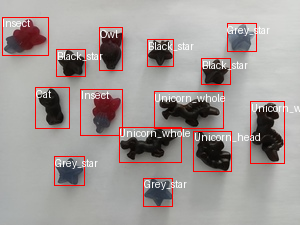

In [12]:
import numpy as np
import os
from PIL import Image, ImageDraw

image = dataset["train"][2]["image"]
annotations = dataset["train"][2]["objects"]
draw = ImageDraw.Draw(image)

for i in range(len(annotations["id"])):
    box = annotations["bbox"][i]
    class_idx = annotations["category"][i]
    x, y, w, h = tuple(box)
    # Check if coordinates are normalized or not
    if max(box) > 1.0:
        # Coordinates are un-normalized, no need to re-scale them
        x1, y1 = int(x), int(y)
        x2, y2 = int(x + w), int(y + h)
    else:
        # Coordinates are normalized, re-scale them
        x1 = int(x * width)
        y1 = int(y * height)
        x2 = int((x + w) * width)
        y2 = int((y + h) * height)
    draw.rectangle((x, y, x + w, y + h), outline="red", width=1)
    draw.text((x, y), id2label[class_idx], fill="white")

image

In [13]:
from transformers import AutoImageProcessor

MODEL_NAME = "microsoft/conditional-detr-resnet-50"  # or "facebook/detr-resnet-50"
IMAGE_SIZE = 480
MAX_SIZE = IMAGE_SIZE

image_processor = AutoImageProcessor.from_pretrained(
    MODEL_NAME,
    do_resize=True,
    size={"max_height": MAX_SIZE, "max_width": MAX_SIZE},
    do_pad=True,
    pad_size={"height": MAX_SIZE, "width": MAX_SIZE},
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

In [14]:
import albumentations as A

train_augment_and_transform = A.Compose(
    [
        A.Perspective(p=0.1),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.HueSaturationValue(p=0.1),
    ],
    bbox_params=A.BboxParams(format="coco", label_fields=["category"], clip=True, min_area=25),
)

validation_transform = A.Compose(
    [A.NoOp()],
    bbox_params=A.BboxParams(format="coco", label_fields=["category"], clip=True),
)

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [15]:
def format_image_annotations_as_coco(image_id, categories, areas, bboxes):
    """Format one set of image annotations to the COCO format

    Args:
        image_id (str): image id. e.g. "0001"
        categories (List[int]): list of categories/class labels corresponding to provided bounding boxes
        areas (List[float]): list of corresponding areas to provided bounding boxes
        bboxes (List[Tuple[float]]): list of bounding boxes provided in COCO format
            ([center_x, center_y, width, height] in absolute coordinates)

    Returns:
        dict: {
            "image_id": image id,
            "annotations": list of formatted annotations
        }
    """
    annotations = []
    for category, area, bbox in zip(categories, areas, bboxes):
        formatted_annotation = {
            "image_id": image_id,
            "category_id": category,
            "iscrowd": 0,
            "area": area,
            "bbox": list(bbox),
        }
        annotations.append(formatted_annotation)

    return {
        "image_id": image_id,
        "annotations": annotations,
    }

def augment_and_transform_batch(examples, transform, image_processor, return_pixel_mask=False):
    """Apply augmentations and format annotations in COCO format for object detection task"""

    images = []
    annotations = []
    for image_id, image, objects in zip(examples["image_id"], examples["image"], examples["objects"]):
        image = np.array(image.convert("RGB"))

        # apply augmentations
        output = transform(image=image, bboxes=objects["bbox"], category=objects["category"])
        images.append(output["image"])

        # format annotations in COCO format
        formatted_annotations = format_image_annotations_as_coco(
            image_id, output["category"], objects["area"], output["bboxes"]
        )
        annotations.append(formatted_annotations)

    # Apply the image processor transformations: resizing, rescaling, normalization
    result = image_processor(images=images, annotations=annotations, return_tensors="pt")

    if not return_pixel_mask:
        result.pop("pixel_mask", None)

    return result

In [16]:
from functools import partial

# Make transform functions for batch and apply for dataset splits
train_transform_batch = partial(
    augment_and_transform_batch, transform=train_augment_and_transform, image_processor=image_processor
)
validation_transform_batch = partial(
    augment_and_transform_batch, transform=validation_transform, image_processor=image_processor
)

dataset["train"] = dataset["train"].with_transform(train_transform_batch)

dataset["validation"] = dataset["validation"].with_transform(validation_transform_batch)

dataset["train"][0]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


{'pixel_values': tensor([[[0.2624, 0.2624, 0.2624,  ..., 0.4508, 0.4337, 0.4337],
          [0.2624, 0.2624, 0.2624,  ..., 0.4508, 0.4337, 0.4337],
          [0.2796, 0.2796, 0.2796,  ..., 0.4679, 0.4508, 0.4337],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.4153, 0.4153, 0.4153,  ..., 0.6254, 0.6078, 0.6078],
          [0.4153, 0.4153, 0.4153,  ..., 0.6254, 0.6078, 0.6078],
          [0.4328, 0.4328, 0.4328,  ..., 0.6429, 0.6254, 0.6078],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.5485, 0.5485, 0.5485,  ..., 0.8274, 0.8099, 0.8099],
          [0.5485, 0.5485, 0.5485,  ..., 0.8274, 0.8099, 0.8099],
          [0.5659, 0.565

In [17]:
import torch

def collate_fn(batch):
    data = {}
    data["pixel_values"] = torch.stack([x["pixel_values"] for x in batch])
    data["labels"] = [x["labels"] for x in batch]
    if "pixel_mask" in batch[0]:
        data["pixel_mask"] = torch.stack([x["pixel_mask"] for x in batch])
    return data

In [19]:
from transformers.image_transforms import center_to_corners_format

def convert_bbox_yolo_to_pascal(boxes, image_size):
    """
    Convert bounding boxes from YOLO format (x_center, y_center, width, height) in range [0, 1]
    to Pascal VOC format (x_min, y_min, x_max, y_max) in absolute coordinates.

    Args:
        boxes (torch.Tensor): Bounding boxes in YOLO format
        image_size (Tuple[int, int]): Image size in format (height, width)

    Returns:
        torch.Tensor: Bounding boxes in Pascal VOC format (x_min, y_min, x_max, y_max)
    """
    # convert center to corners format
    boxes = center_to_corners_format(boxes)

    # convert to absolute coordinates
    height, width = image_size
    boxes = boxes * torch.tensor([[width, height, width, height]])

    return boxes

In [20]:
import numpy as np
from dataclasses import dataclass
from torchmetrics.detection.mean_ap import MeanAveragePrecision

@dataclass
class ModelOutput:
    logits: torch.Tensor
    pred_boxes: torch.Tensor


@torch.no_grad()
def compute_metrics(evaluation_results, image_processor, threshold=0.0, id2label=None):
    """
    Compute mean average mAP, mAR and their variants for the object detection task.

    Args:
        evaluation_results (EvalPrediction): Predictions and targets from evaluation.
        threshold (float, optional): Threshold to filter predicted boxes by confidence. Defaults to 0.0.
        id2label (Optional[dict], optional): Mapping from class id to class name. Defaults to None.

    Returns:
        Mapping[str, float]: Metrics in a form of dictionary {<metric_name>: <metric_value>}
    """

    predictions, targets = evaluation_results.predictions, evaluation_results.label_ids

    # For metric computation we need to provide:
    #  - targets in a form of list of dictionaries with keys "boxes", "labels"
    #  - predictions in a form of list of dictionaries with keys "boxes", "scores", "labels"

    image_sizes = []
    post_processed_targets = []
    post_processed_predictions = []

    # Collect targets in the required format for metric computation
    for batch in targets:
        # collect image sizes, we will need them for predictions post processing
        batch_image_sizes = torch.tensor(np.array([x["orig_size"] for x in batch]))
        image_sizes.append(batch_image_sizes)
        # collect targets in the required format for metric computation
        # boxes were converted to YOLO format needed for model training
        # here we will convert them to Pascal VOC format (x_min, y_min, x_max, y_max)
        for image_target in batch:
            boxes = torch.tensor(image_target["boxes"])
            boxes = convert_bbox_yolo_to_pascal(boxes, image_target["orig_size"])
            labels = torch.tensor(image_target["class_labels"])
            post_processed_targets.append({"boxes": boxes, "labels": labels})

    # Collect predictions in the required format for metric computation,
    # model produce boxes in YOLO format, then image_processor convert them to Pascal VOC format
    for batch, target_sizes in zip(predictions, image_sizes):
        batch_logits, batch_boxes = batch[1], batch[2]
        output = ModelOutput(logits=torch.tensor(batch_logits), pred_boxes=torch.tensor(batch_boxes))
        post_processed_output = image_processor.post_process_object_detection(
            output, threshold=threshold, target_sizes=target_sizes
        )
        post_processed_predictions.extend(post_processed_output)

    # Compute metrics
    metric = MeanAveragePrecision(box_format="xyxy", class_metrics=True)
    metric.update(post_processed_predictions, post_processed_targets)
    metrics = metric.compute()

    # Replace list of per class metrics with separate metric for each class
    classes = metrics.pop("classes")
    map_per_class = metrics.pop("map_per_class")
    mar_100_per_class = metrics.pop("mar_100_per_class")
    for class_id, class_map, class_mar in zip(classes, map_per_class, mar_100_per_class):
        class_name = id2label[class_id.item()] if id2label is not None else class_id.item()
        metrics[f"map_{class_name}"] = class_map
        metrics[f"mar_100_{class_name}"] = class_mar

    metrics = {k: round(v.item(), 4) for k, v in metrics.items()}

    return metrics


eval_compute_metrics_fn = partial(
    compute_metrics, image_processor=image_processor, id2label=id2label, threshold=0.0
)

In [21]:
from transformers import AutoModelForObjectDetection

model = AutoModelForObjectDetection.from_pretrained(
    MODEL_NAME,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True,
)

config.json:   0%|          | 0.00/4.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/174M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of ConditionalDetrForObjectDetection were not initialized from the model checkpoint at microsoft/conditional-detr-resnet-50 and are newly initialized because the shapes did not match:
- class_labels_classifier.bias: found shape torch.Size([91]) in the checkpoint and torch.Size([8]) in the model instantiated
- class_labels_classifier.weight: found shape torch.Size([91, 256]) in the checkpoint and torch.Size([8, 256]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="detr_finetuned_candy",
    num_train_epochs=300,
    fp16=False,
    per_device_train_batch_size=1,
    dataloader_num_workers=4,
    learning_rate=1e-4,
    lr_scheduler_type="cosine",
    weight_decay=1e-4,
    max_grad_norm=0.01,
    metric_for_best_model="eval_map",
    greater_is_better=True,
    load_best_model_at_end=True,
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    remove_unused_columns=False,
    eval_do_concat_batches=False,
    push_to_hub=False,
    logging_steps=1,
)

In [23]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset['validation'],
    tokenizer=image_processor,
    data_collator=collate_fn,
    compute_metrics=eval_compute_metrics_fn,
)

trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


TrainOutput(global_step=3300, training_loss=0.5985502048536684, metrics={'train_runtime': 952.891, 'train_samples_per_second': 3.463, 'train_steps_per_second': 3.463, 'total_flos': 5.928708183552e+17, 'train_loss': 0.5985502048536684, 'epoch': 300.0})

In [41]:
from pprint import pprint

metrics = trainer.evaluate(eval_dataset=dataset["validation"], metric_key_prefix="validation")
pprint(metrics)

{'epoch': 300.0,
 'validation_loss': 0.1333179622888565,
 'validation_map': 0.9875,
 'validation_map_50': 1.0,
 'validation_map_75': 1.0,
 'validation_map_Black_star': -1.0,
 'validation_map_Cat': -1.0,
 'validation_map_Grey_star': -1.0,
 'validation_map_Insect': 1.0,
 'validation_map_Moon': 0.9749,
 'validation_map_Owl': -1.0,
 'validation_map_Unicorn_head': -1.0,
 'validation_map_Unicorn_whole': -1.0,
 'validation_map_large': -1.0,
 'validation_map_medium': 1.0,
 'validation_map_small': 0.9715,
 'validation_mar_1': 0.325,
 'validation_mar_10': 0.9917,
 'validation_mar_100': 0.9917,
 'validation_mar_100_Black_star': -1.0,
 'validation_mar_100_Cat': -1.0,
 'validation_mar_100_Grey_star': -1.0,
 'validation_mar_100_Insect': 1.0,
 'validation_mar_100_Moon': 0.9833,
 'validation_mar_100_Owl': -1.0,
 'validation_mar_100_Unicorn_head': -1.0,
 'validation_mar_100_Unicorn_whole': -1.0,
 'validation_mar_large': -1.0,
 'validation_mar_medium': 1.0,
 'validation_mar_small': 0.98,
 'validation_ru

In [24]:
trainer.save_model('candy_detector')

In [42]:
from transformers import pipeline

def candy_counter(image):
    obj_detector = pipeline("object-detection", model="candy_detector")
    results = obj_detector(image)
    candy_counts = {}
    for item in results:
        label = item['label']
        candy_counts[label] = candy_counts.get(label, 0) + 1

    return candy_counts

In [43]:
from PIL import Image
import numpy as np

image_path = '/content/candy_hugging_face_folder/test/7d03bdd6-cd_35.jpg'
candy_count = candy_counter(image_path)
print("Candy count:", candy_count)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Candy count: {'Unicorn_whole': 2, 'Insect': 2, 'Moon': 3, 'Unicorn_head': 2, 'Grey_star': 4, 'Black_star': 1, 'Owl': 2, 'Cat': 1}


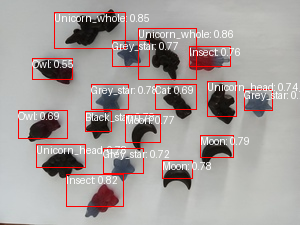

In [36]:
from PIL import Image, ImageDraw

image = Image.open(image_path)
draw = ImageDraw.Draw(image)

for detection in result:
    bbox = detection['box']

    x1 = int(bbox['xmin'])
    y1 = int(bbox['ymin'])
    x2 = int(bbox['xmax'])
    y2 = int(bbox['ymax'])

    label = f"{detection['label']}: {detection['score']:.2f}"

    draw.rectangle((x1, y1, x2, y2), outline="red", width=1)
    draw.text((x1, y1), label, fill="white")

display(image)